In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

학습 목표
1. loc, iloc를 활용한 데이터 선택 및 조건 필터링0
2. 누락 데이터 처리(삭제 및 대체)
3. 주요 변수와 주택 가격 간의 관계를 산포도로 시각화
4. 변수 선택의 중요성을 이해하고 데이터 해석 능력 향상

In [8]:
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 다음과 같이 코드를 수정합니다.
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
file_name = "../datas/boston.txt"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df = pd.read_csv(file_name, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [10]:
# 보스턴 주택 데이터 불러오기
#data_url = "http://lib.stat.cmu.edu/datasets/boston"
#raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

file_name = "../datas/boston.txt"
raw_df = pd.read_csv(file_name, sep="\s+", skiprows=22, header=None)

In [11]:
# 데이터프레임의 구조 확인
print(raw_df.head())  # 데이터 샘플 출력
print(raw_df.info())  # 데이터프레임 정보 (행, 열, 데이터 타입 등)


          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1012 non-null   float64
 1   1       1012 non-null   float64
 2   2       1012 non-null   float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 n

In [12]:
import numpy as np

# 데이터 정리 및 컬럼 이름 설정
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target  # MEDV 추가
print(df.head())  # 컬럼 이름이 포함된 데이터 출력
print(df.info())  # 정리된 데이터프레임의 정보 확인


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-nu

컬럼 이름과 의미
CRIM (per capita crime rate by town)

지역별 인구당 범죄율.
ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)

25,000 평방피트 이상의 대규모 주택 부지에 할당된 주거 지역의 비율.
INDUS (proportion of non-retail business acres per town)

비소매 상업 지역 면적 비율.
CHAS (Charles River dummy variable)

찰스 강 근처에 위치한 지역 여부 (1: 근처, 0: 그 외).
NOX (nitric oxides concentration in parts per 10 million)

일산화질소 농도 (10ppm 단위).
RM (average number of rooms per dwelling)

주택당 평균 방 개수.
AGE (proportion of owner-occupied units built prior to 1940)

1940년 이전에 건축된 자가 소유 주택 비율.
DIS (weighted distances to five Boston employment centers)

보스턴 고용 센터 5곳까지의 가중 거리.
RAD (index of accessibility to radial highways)

방사형 고속도로 접근성 지수.
TAX (full-value property tax rate per $10,000)

10,000달러당 재산세율.
PTRATIO (pupil-teacher ratio by town)

지역별 학생-교사 비율.
B (1000(Bk - 0.63)^2 where Bk is the proportion of Black population by town)

지역별 흑인 인구 비율 (비선형 변환 적용).
LSTAT (percentage of lower status of the population)

저소득층 인구 비율.
MEDV (Median value of owner-occupied homes in $1000's)

자가 소유 주택의 중앙값 (단위: $1,000).


실습 과제
과제 1: 데이터 선택 및 조건 필터링
1. iloc를 사용하여 첫 15개의 데이터를 출력하고, CRIM, RM, MEDV 열만 선택하세요.
2. loc를 사용하여 RM 값이 6.5 이상인 데이터만 선택하고, 해당 데이터의 평균 MEDV를 계산하세요.
3. TAX 값이 400 이상이고 NOX 값이 0.6 이상인 데이터를 선택하세요.

과제 2: 누락 데이터 처리
1. DIS 열에 무작위로 15%의 데이터를 NaN 값으로 설정하세요.
2. 누락 데이터를 확인하고 다음 방법으로 처리하세요:
누락 데이터를 포함하는 행을 삭제.
누락된 데이터를 DIS 열의 중앙값으로 대체.

과제 3: 주요 변수와 주택 가격의 관계 분석
1. 주택 가격(MEDV)에 가장 큰 영향을 미칠 것으로 보이는 변수를 선택하세요:
예시: RM(방의 개수), LSTAT(낮은 사회경제적 지위 비율), PTRATIO(학생-교사 비율).
2. 선택한 변수와 MEDV 간의 관계를 산포도로 시각화하세요.
X축: 선택한 변수
Y축: MEDV
산포도에 적절한 제목과 축 레이블 추가.



1. 데이터 선택 및 조건 필터링


RM >= 6.5인 데이터 평균 MEDV:

조건에 맞는 데이터:


2. 누락 데이터 처리
누락 데이터 개수:


누락 데이터 삭제 후 형태:

누락 데이터 중앙값 대체 후 샘플:



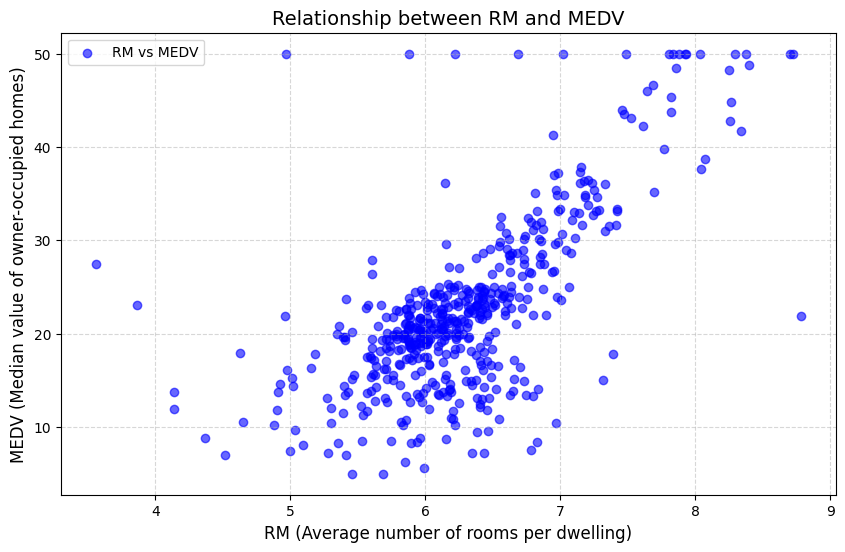

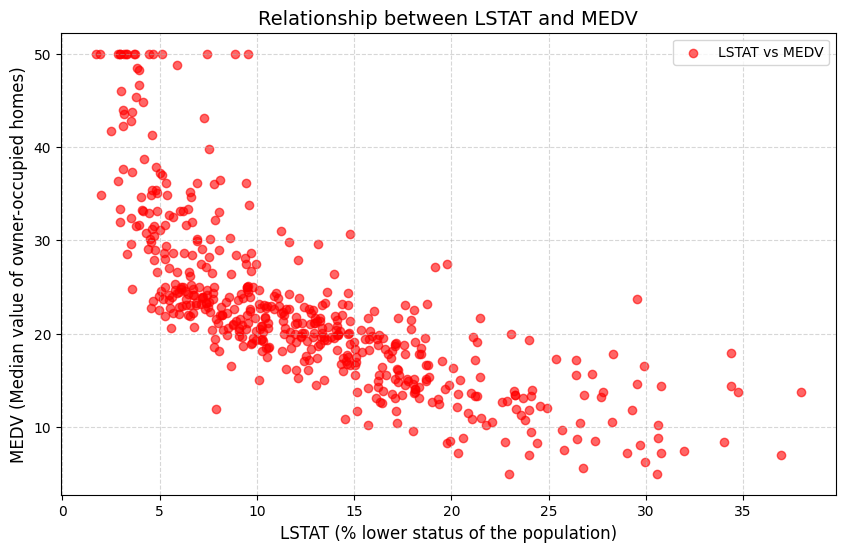

In [13]:
# 과제 1: 데이터 선택 및 조건 필터링
print("\n1. 데이터 선택 및 조건 필터링")
print()  # 첫 15개 데이터, CRIM, RM, MEDV 열

print("\nRM >= 6.5인 데이터 평균 MEDV:", )

print("\n조건에 맞는 데이터:\n", )

# 과제 2: 누락 데이터 처리

print("\n2. 누락 데이터 처리")
print("누락 데이터 개수:\n", )

# 2.1. 누락된 행 삭제

print("\n누락 데이터 삭제 후 형태:", )

# 2.2. 중앙값으로 누락 데이터 대체

print("\n누락 데이터 중앙값 대체 후 샘플:\n", )

# 과제 3: 주요 변수와 주택 가격의 관계 분석
plt.figure(figsize=(10, 6))

# 예: RM과 MEDV의 관계
plt.scatter(df['RM'], df['MEDV'], alpha=0.6, c='blue', label='RM vs MEDV')
plt.title('Relationship between RM and MEDV', fontsize=14)
plt.xlabel('RM (Average number of rooms per dwelling)', fontsize=12)
plt.ylabel('MEDV (Median value of owner-occupied homes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# 예: LSTAT과 MEDV의 관계
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.6, c='red', label='LSTAT vs MEDV')
plt.title('Relationship between LSTAT and MEDV', fontsize=14)
plt.xlabel('LSTAT (% lower status of the population)', fontsize=12)
plt.ylabel('MEDV (Median value of owner-occupied homes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
